# Compare r-band magnitudes
Plot measured CFIS r-band magnitudes vs. public CFHTLenS r-band from matched catalogue in W3 area.

In [1]:
import os
import sys

from functions import *
import params_ps3pi_cfis as params

In [2]:
py_v = '3.7'
path = f"{os.environ['CONDA_PREFIX']}/../shapepipe/lib/python{py_v}/site-packages/shapepipe-0.0.2-py{py_v}.egg"
sys.path.append(path)
from shapepipe.utilities.canfar import download

In [3]:
cat_dir = './catalogs'

## Download catalogue
Automatically skipped if already available

In [4]:
vos_dir = 'vos:cfis/cosmostat/catalogues/multi_band_matched/W3_deep23'
cat_name = 'R_CFHT_vs_CFIS.csv'
cat_path = f'{cat_dir}/{cat_name}'
download(f'{vos_dir}/{cat_name}', cat_path, verbose=True)

Target file ./catalogs/R_CFHT_vs_CFIS.csv exists, skipping download.


offset = 0.082 +/- 0.0033


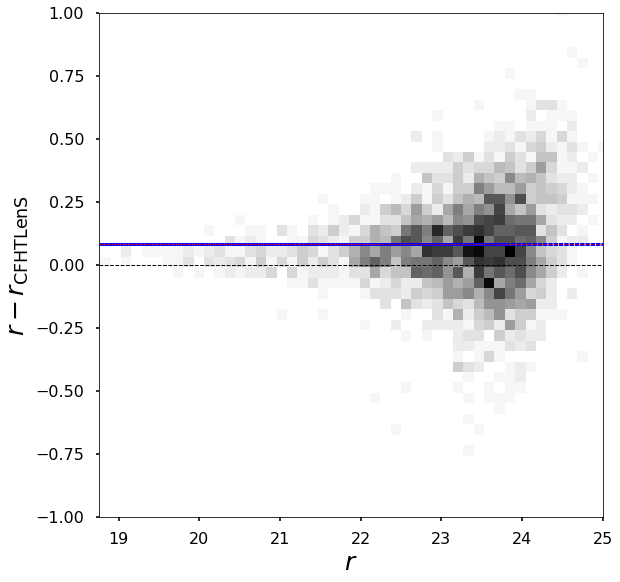

In [5]:
CFHT_CFIS = pd.read_csv(cat_path)
CFHT_CFIS = CFHT_CFIS.dropna()

MAG_r = CFHT_CFIS['MAG_r'].values
MAG_AUTO_R = CFHT_CFIS['MAG_AUTO_R'].values

fig = plt.figure(figsize=(7,7), tight_layout=False)

ax = fig.add_subplot(111)
ax.set_facecolor('white')
ax.grid(True, color='grey', lw=0.5)
ax.set_ylabel('$r - r_\\mathrm{{CFHTLenS}}$', size=25)
ax.set_xlabel('$r$', size=25)

dr = MAG_r - MAG_AUTO_R
counts, ybins, xbins, image = ax.hist2d(MAG_r, dr, bins=50, cmap='gist_yarg')
ax.contour(counts.transpose(), extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)
#ax.contour(im[1], im[2])

xmin = np.amin(MAG_AUTO_R)
xmax = 25
ax.set_xlim(xmin, xmax)
ax.set_ylim([-1.0, 1.0])

plt.subplots_adjust(bottom=0, top=1, left=0, right=1)

ax.plot([xmin, 25], [0, 0], linewidth=1, color='k', linestyle='--')

deg = 0
coef, cov = np.polyfit(MAG_r, dr, deg, cov=True)
dm = np.sqrt(cov[0])[0]
print(f'offset = {coef[0]:.2g} +/- {dm:.2g}')
func = np.poly1d(coef, )
ax.plot(MAG_r, func(MAG_r), '--r', linewidth=1)
ax.plot(MAG_r, func(MAG_r) + dm, '--b', linewidth=1)
ax.plot(MAG_r, func(MAG_r) - dm, '--b', linewidth=1)

plt.savefig('R_CFHT_vs_R_CFIS.pdf', bbox_inches='tight', transparent=True)
plt.show()

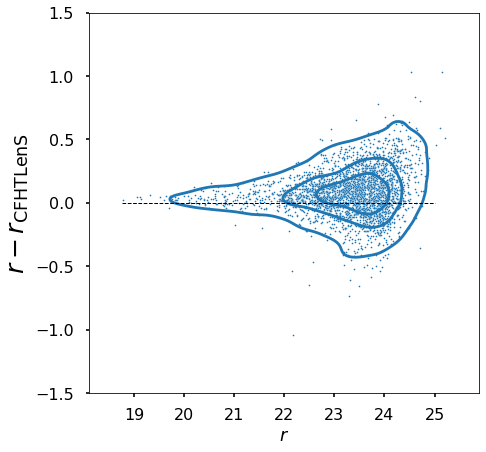

In [6]:
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(7,7), tight_layout=False)

df = pd.DataFrame.from_records({'r': MAG_r, 'dr': dr})

ax = sns.scatterplot(data=df, x='r', y='dr', s=3)
sns.kdeplot(data=df, x='r', y='dr', linewidth=0.5, colo='.2', levels=4)
ax.plot([xmin, 25], [0, 0], linewidth=1, color='k', linestyle='--')

xlab = ax.set_xlabel('$r$')
ylab = ax.set_ylabel('$r - r_\\mathrm{{CFHTLenS}}$', size=25)
ylim = ax.set_ylim((-1.5, 1.5))

plt.savefig('R_CFHT_vs_R_CFIS_sns.pdf', bbox_inches='tight', transparent=True)